In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_predict, cross_validate, \
    StratifiedKFold, train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Our Data (training set):
df_titanic_train = pd.read_csv('titanic_data/train.csv')
df_titanic_test = pd.read_csv('titanic_data/test.csv')

# Inital Review of Data:

1. Review Dataframes
2. Check for missing values
3. Look for Patterns!

## Review Dataframes

## Description of Columns:

We have some numerical, and some categorical columns in our data set. Our objective for this ML task
is to predict if some of these 'features' can tell us about the survival of one of the passengers.

Categorical: Survived, Pclass, Sex and Embarked
Numerical: Age, Fare, SibSp, Parch

SibSp -> Siblings and spouses on board
Parch -> Parents and children on board

In [3]:
# Lets Look at our dataframe
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Lets look at our test data fram:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Our data is split 70% for Training and 30% Testing - These are preset by Kaggle
# We can combine them and reshuffle them if we wanted to by:
df_titanic = pd.concat([df_titanic_train, df_titanic_test], ignore_index=True)

In [9]:
# Lets look at our combined Data Frame

df_titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Missing Values

Lets find out if there are missing values in some of our columns!

In [10]:
# Now lets figure out, is our data complete and is there missing information?
# We will do this for both training and testing data

print('Info on Training Set:')
df_titanic_train.info()

print('*'*80)
print('Info on Test Set:')
df_titanic_test.info()

print('*'*80)
print('Info on Entire Set:')
df_titanic.info()

print('*'*80)

Info on Training Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
********************************************************************************
Info on Test Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       

## Fix missing values

We can see that we have missing values in a few columns above. Most noticeably in cabin.

We also have a few missing values in age.

Given what we know about the data set, we can make a few sound assumptions now:
1. Ticket should not have any correlation except by random chance to survival.
2. PassengerID is simply the default index of the passengers and does not hold meaningful information.
3. Names may and or may not be useful. Not 100% certain. We could potentially try to extract titles however
that may already be conveyed within the sex column to some extent.
4. Cabin column has lots of missing values. Should be dropped and not used to make any predictions.

We can choose to do a lot of feature engineering such as some ideas below:

* Create age ranges with bins to turn the numerical feature into a categorical one.
* Create a fare range feature with bins to turn it into a categorical one as well
* Use presence of last names as a feature to see if families or individuals were more likely to survive.

I will only be doing the first two here today for time and simplicity's sake.


In [11]:
# Lets start by dropping un-needed columns/features:
df_titanic_train.drop(['Ticket','Cabin', 'PassengerId'], axis=1, inplace=True)
df_titanic_test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df_titanic.drop(['Ticket','Cabin', 'PassengerId'], axis=1, inplace=True)

In [13]:
# Lets deal with missing values within our columns first:
# How many missing values do we have in each column?
print("Information regarding Training Set - Missing Values:")
print(df_titanic_train.isnull().sum())

print("Information regarding Testing Set - Missing Values:")
print(df_titanic_test.isnull().sum())

print("Information regarding Entire Set - Missing Values:")
print(df_titanic.isnull().sum())
print('*'*40)
# We can see that we have missing values in three columns: Age,Fare and Embarked.


Information regarding Training Set - Missing Values:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Information regarding Testing Set - Missing Values:
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Information regarding Entire Set - Missing Values:
Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64
****************************************


In [14]:
# A sklearn imputer allows us to fill those values based on a preset strategy.
# In the case of Embarked, we will use the mode values to fill the missing.
# In the case of Age, Fare we will use the median to fill it. Age should be whole numbers...
emb_imp = SimpleImputer(strategy='most_frequent')

# Train the imputer on the entire data set:
df_titanic[['Embarked']] = emb_imp.fit_transform(df_titanic[['Embarked']])

# Update columns in test and training DFs:
df_titanic_train[['Embarked']] = emb_imp.transform(df_titanic_train[['Embarked']])
df_titanic_test[['Embarked']] = emb_imp.transform(df_titanic_test[['Embarked']])

# Train a new imputer for fare and age based on median:
age_fare_imputer = SimpleImputer(strategy='median')
df_titanic[['Age','Fare']] = age_fare_imputer.fit_transform(df_titanic[['Age','Fare']])

df_titanic_train[['Age','Fare']] = age_fare_imputer.transform(df_titanic_train[['Age','Fare']])
df_titanic_test[['Age','Fare']] = age_fare_imputer.transform(df_titanic_test[['Age','Fare']])

# Sanity check to ensure the values have been updated:
print('Missing values after imputer application - Training Set:\n')
print(df_titanic_train.isnull().sum())
print('*'*40)
print('Missing values after imputer application - Testing Set:\n')
print(df_titanic_test.isnull().sum())
print('*'*40)
print('Missing values for entire set:')
print(df_titanic.isnull().sum())

Missing values after imputer application - Training Set:

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
****************************************
Missing values after imputer application - Testing Set:

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
****************************************
Missing values for entire set:
Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

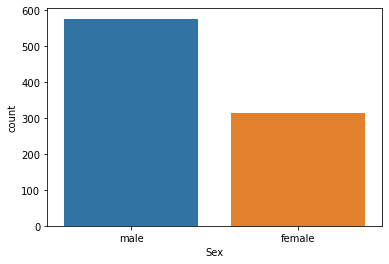

In [15]:
# How about we get some useful stats about our data set?
# We will focus on only the training set since it includes labels!

sns.countplot(df_titanic_train['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

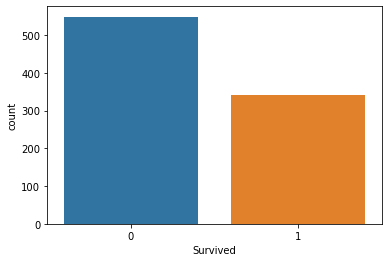

In [16]:
sns.countplot(df_titanic_train['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

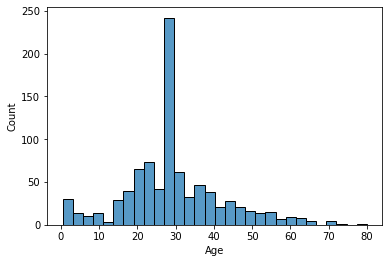

In [17]:
# We can see that there seems to be some connection between the gender of the passenger and the survival.

sns.histplot(df_titanic_train['Age'])

We see that the number of survivors seems very close to the number of female passengers.

Let's check if there is some kind of pattern:

In [18]:
women_survivors = sum(df_titanic_train.loc[df_titanic_train.Sex == 'female']['Survived'])
women_num = len(df_titanic_train.loc[df_titanic_train.Sex == 'female'])

man_survivors = sum(df_titanic_train.loc[df_titanic_train.Sex == 'male']['Survived'])
man_num = len(df_titanic_train.loc[df_titanic_train.Sex == 'male'])

print(f'Number of Woman On Board: {women_num}\nNumber of Women Who Survived: {women_survivors}/'
      f'\nWoman Survived Ratio: {women_survivors/women_num}\n\n\n')


print(f'Number of Men On Board: {man_num}\nNumber of Men Who Survived: {man_survivors}/'
      f'\nWoman Survived Ratio: {man_survivors/man_num}\n\n')

print(f'General Survival Rate: {sum(df_titanic_train.Survived)/len(df_titanic_train)}')

Number of Woman On Board: 314
Number of Women Who Survived: 233/
Woman Survived Ratio: 0.7420382165605095



Number of Men On Board: 577
Number of Men Who Survived: 109/
Woman Survived Ratio: 0.18890814558058924


General Survival Rate: 0.3838383838383838


## Some Patterns:

We can already see that about 70% of the woman on the ship survived. This sets up a baseline for us.
We can be reasonably certain that if a given passenger was a woman, she was likely to survive. And
vice versa for woman.

Our machine learning model should atleast be better than this rather simple guess?

# Preprocessing

Preprocessing can take lots of forms and steps! Some of them include scaling, normalizing and/or feature engineering. 

For this project we will do some basic feature engineering to show you the concepts. 

We also want to convert our categorical features either into a dummy variable encoding,
One hot encoding, or ordinal encoding
ML algorithms like numbers, not words.

For more info about this: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

## Encoding Categorical Variables

In [19]:
# Ordinal encoding for sex and embarked. Ordinal encoding turns strings to 0,1,2 etc. This is only useful when you have
# a few categorical variable values that keep occurring.
emb_sex_ordinal_encoder = OrdinalEncoder()

# fit it on the entire data set and transform each set as well.
df_titanic[['Sex','Embarked']] = emb_sex_ordinal_encoder.fit_transform(df_titanic[['Sex','Embarked']])
df_titanic_test[['Sex','Embarked']] = emb_sex_ordinal_encoder.transform(df_titanic_test[['Sex','Embarked']])
df_titanic_train[['Sex','Embarked']] = emb_sex_ordinal_encoder.transform(df_titanic_train[['Sex','Embarked']])

We have now filled in missing values and converted some of our categorical variables into a numerical form.

The next step is understanding our data to see if further feature engineering maybe useful?
Lets begin with age and fare. Since this is a relatively small data set, it might be useful to group those values
into bins that can then be used as categorical variables.

The logic behind this is, are certain age groups more likely to survive such as infants vs elderly? Are rich people
who may have paid a higher fare more likely to have survived?

## Feature Engineering for Further Insights!

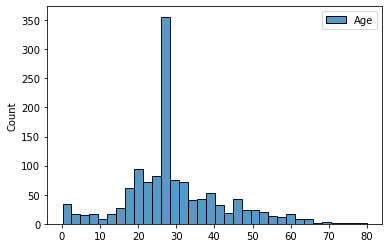

In [21]:
# Lets see a distribution of ages in our data set:
sns.histplot(df_titanic[['Age']])

# Lets divide up the age groups into bins:
age_categorical, bins = pd.cut(df_titanic.Age, bins=4, labels=False, retbins=True)

In [22]:
print(f'Categorical Age Counts:\n{age_categorical.value_counts()}')

# use the bins we created to create new columns in each of the dfs to add a new column:
for df in [df_titanic,df_titanic_train,df_titanic_test]:
    df[['Age_Cat']] = pd.cut(df.Age, bins=bins, labels=False, include_lowest=True,)


Categorical Age Counts:
1    834
0    248
2    194
3     33
Name: Age, dtype: int64


              Fare
count  1309.000000
mean     33.281086
std      51.741500
min       0.000000
25%       7.895800
50%      14.454200
75%      31.275000
max     512.329200


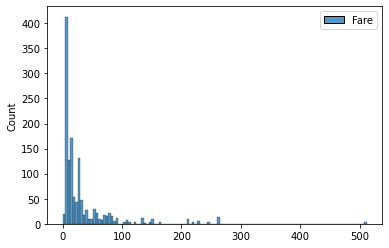

In [24]:
sns.histplot(df_titanic[['Fare']])
print(df_titanic[['Fare']].describe())

# We can see that we have a wide range of values when it comes to fares. Lets divide them up into bins but we should
# do this with manually defined bins based on quantiles

bins_fare = [0.0,8.0, 15.0, 40, 600]

for df in [df_titanic, df_titanic_train, df_titanic_test]:
    df['Fare_Cat'] = pd.cut(df.Fare, bins=bins_fare, labels=False, include_lowest=True)

We are alright for some basic feature engineering now. Lets try some algorithms to see how well they
perform. We will use a strategy called Stratified K Fold.

Read more on sklearn's website:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [25]:
# Split data into labels and features:
X = df_titanic_train[['Pclass', 'Sex','SibSp','Parch','Embarked', 'Age_Cat','Fare_Cat']]
y = df_titanic_train[['Survived']]

print(f'X Shape: {X.shape}\ny shape: {y.shape}')
assert(len(X) == len(y))

X Shape: (891, 7)
y shape: (891, 1)


In [26]:
# We have 7 features we will be using to train our models


# By default cross_validate uses StratifiedKFold
# We will start with a simple linear model using Logistic Regression to see how well it does on our given features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



We can see that all of our work so far has been effective, and our dataset after wrangling works! Let's run a few tests
to see if an algorithm is better than another with just the base parameters.

In [28]:
scores_dict = {}

model_dict = {
    'LR':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'KNN':KNeighborsClassifier(),
    'DTC':DecisionTreeClassifier(),
    'MLP':MLPClassifier(),
}

for key,val in model_dict.items():
    scores_dict[key] = cross_val_score(val, X, y, cv=5, n_jobs=-1, scoring='accuracy')

In [29]:
# Create a DF from our scores dictionary.
scores_df = pd.DataFrame(scores_dict)

In [31]:
scores_df

,LR,RFC,KNN,DTC,MLP
0,0.748603,0.787709,0.748603,0.776536,0.759777
1,0.797753,0.780899,0.792135,0.780899,0.831461
2,0.780899,0.859551,0.820225,0.859551,0.797753
3,0.769663,0.831461,0.803371,0.825843,0.797753
4,0.814607,0.825843,0.814607,0.814607,0.814607


In [30]:
# Lets the SD and Mean of each of the columns to compare the score more effectively!
for mean, sd, clf_name in zip(list(scores_df.mean()), list(scores_df.std()), list(scores_df.columns)):
    print(f'{clf_name}: {mean:.2f} \u00B1 {sd:.2f}')

# We can see that  there isn't a lot of difference in the performance of each of teh classifiers.
# Part of this is due to a lack of extensive feature engineering and the other is due to lack of hyper parameter
# optimization.

LR: 0.78 ± 0.03
RFC: 0.82 ± 0.03
KNN: 0.80 ± 0.03
DTC: 0.81 ± 0.03
MLP: 0.80 ± 0.03


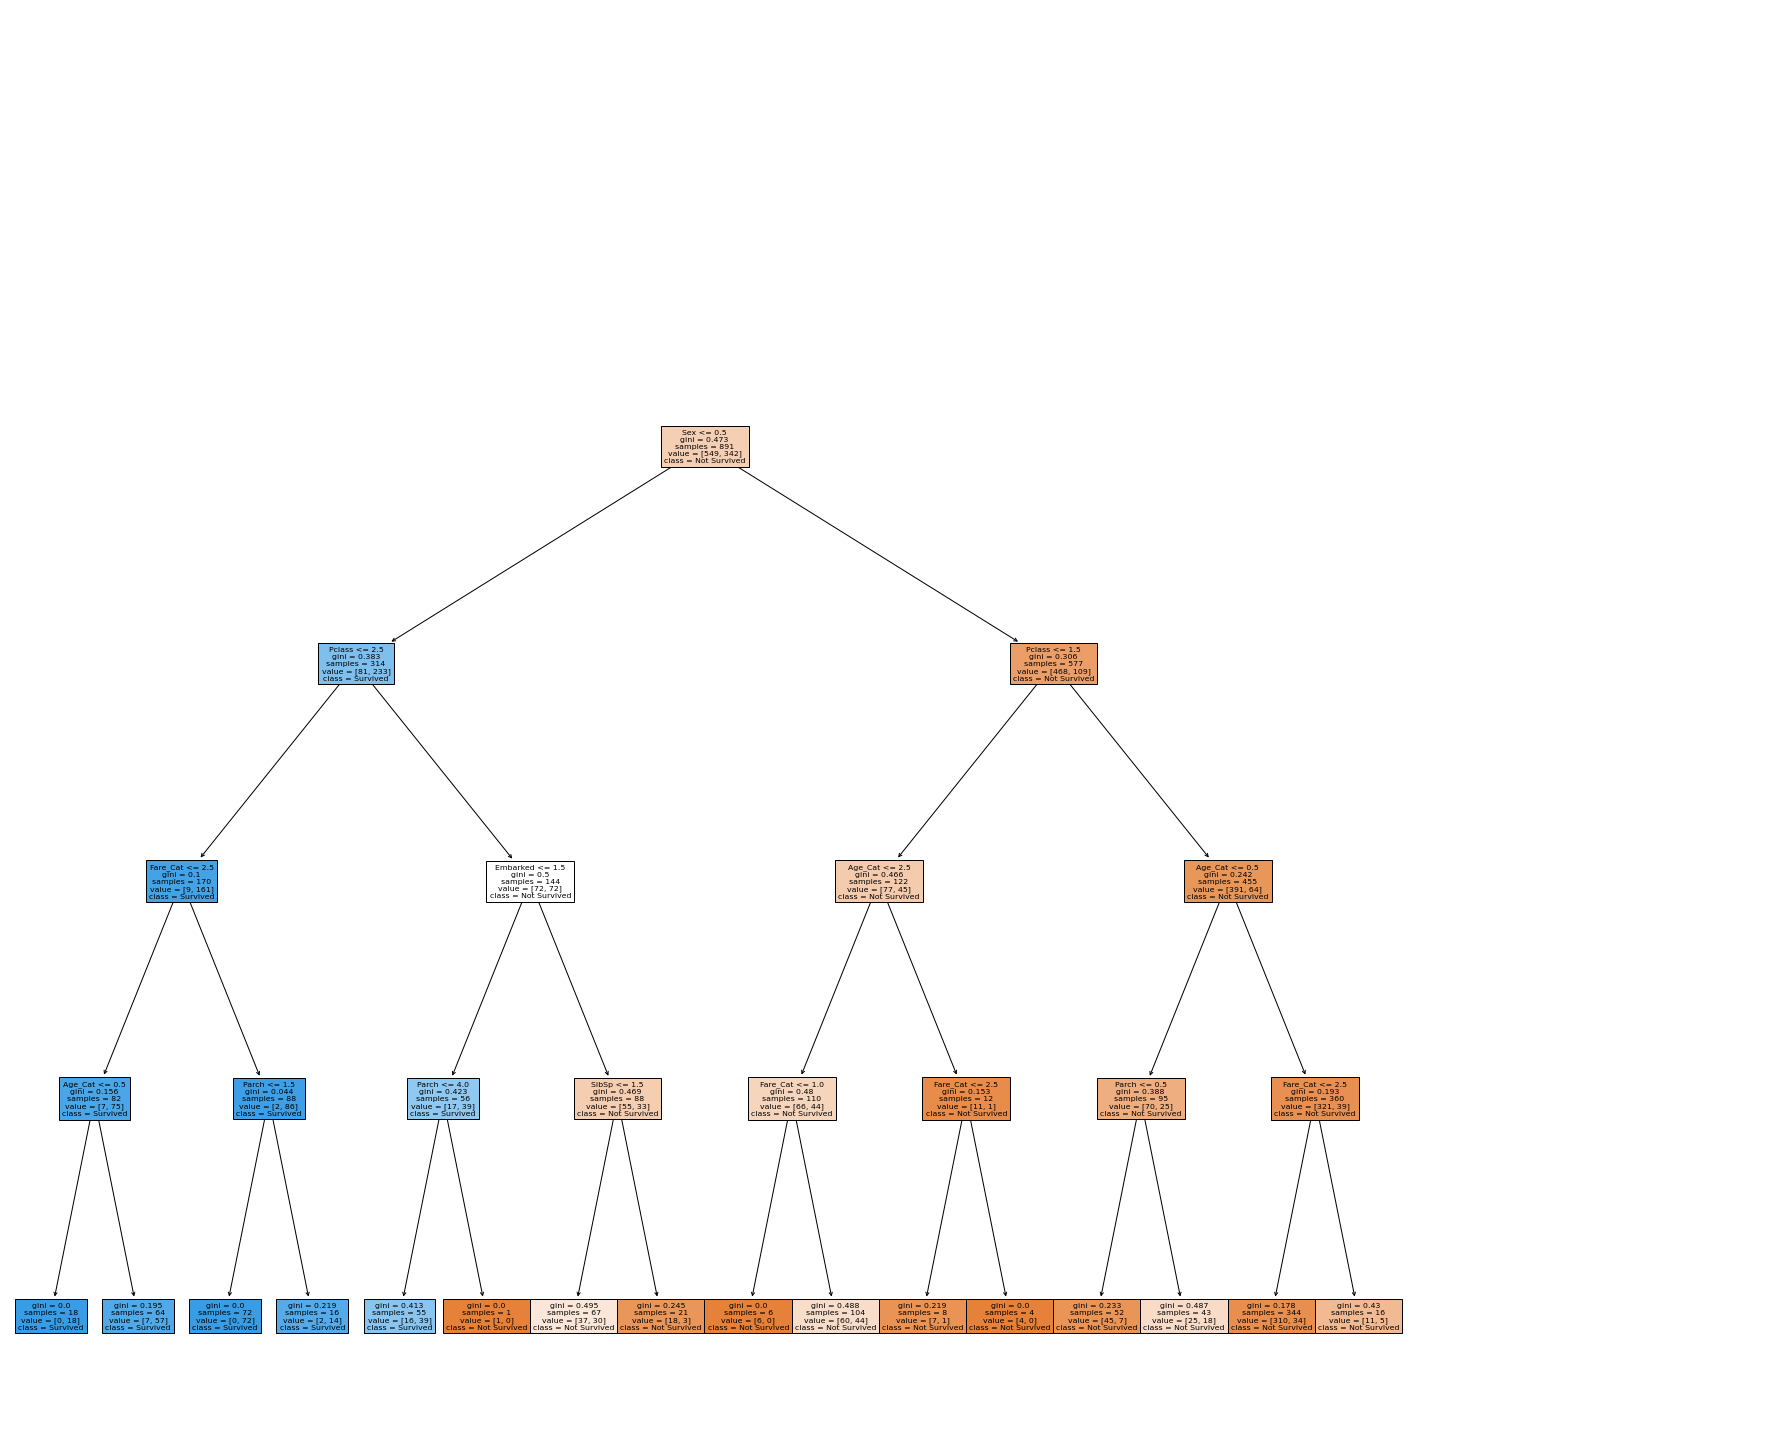

In [32]:
# Visualize some of our models:
dtm = DecisionTreeClassifier(max_depth=4)
dtm.fit(X, y)



fig = plt.figure(figsize=(25,20))
tree_fig = plot_tree(dtm,
              feature_names=X.columns,
              class_names=['Not Survived', 'Survived'],
              filled=True)
plt.tight_layout()
plt.savefig('Tree.png')

## What is Overfitting?

This is an important concept to understand and part of why we use a cross-validation approach when testing our models.

Overfitting happens when we try to get the model to fit 'too perfectly' to our data set. This can result from prolonged
training, overly complex models, small non-generalized datasets etc.

It is usually evident by an increasing training score, but a decreasing validation score.

<module 'matplotlib.pyplot' from '/home/sharyarmemon/anaconda3/envs/gesar-linux/lib/python3.8/site-packages/matplotlib/pyplot.py'>

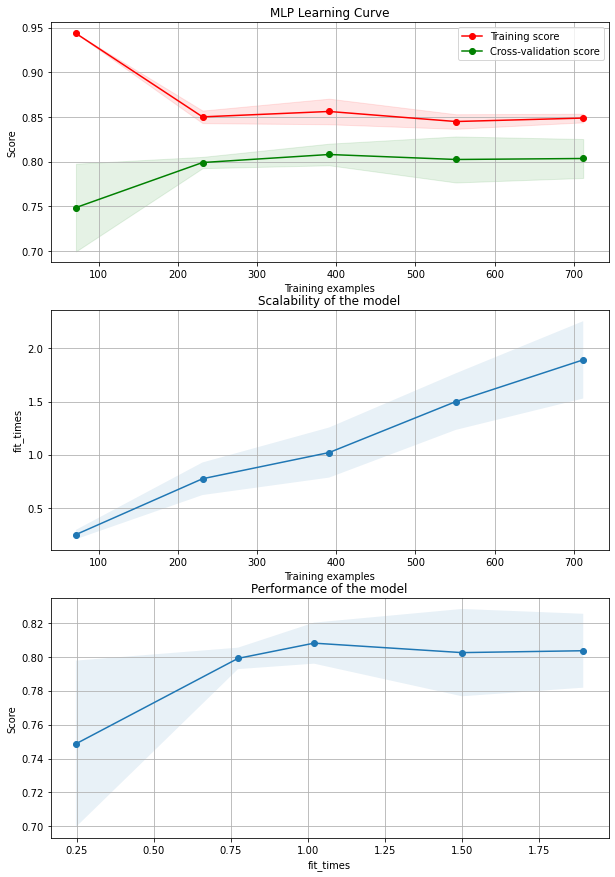

In [33]:
from plot_helper import plot_learning_curve
fig_, ax_ = plt.subplots(3,1, figsize=(10,15))
estimator = MLPClassifier(max_iter=400, alpha=0.00001)
plot_learning_curve(estimator, 'MLP Learning Curve', X, y, axes=ax_)

## Utility Functions in Sklearn

Sklearn is full of amazing functionality!
One of my favorite part is the ability to test the performance of our models very extensively!

Lets look at a few utility functions that can come in handy when building your models:

* Confusion matrix
* Classification report
* Roc-auc curves

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



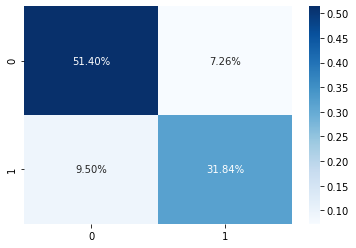

In [34]:
# We will use the RFC to demonstrate this:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_predictions = rfc_model.predict(X_test)

cf_matrix = confusion_matrix(y_test, rfc_predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

print(classification_report(y_test, rfc_predictions))


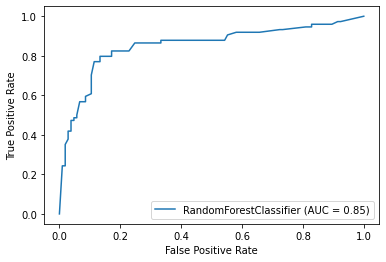

In [35]:
plot_roc_curve(rfc_model, X_test, y_test)

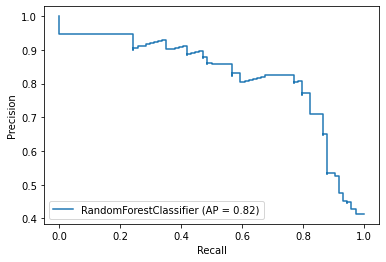

In [36]:
plot_precision_recall_curve(rfc_model, X_test, y_test)

In [ ]:
## Did our feature engineering actually work?

In [37]:
# Split data into labels and features:
X_uneng = df_titanic_train[['Pclass', 'Sex','SibSp','Parch','Embarked', 'Age', 'Fare']]
y = df_titanic_train[['Survived']]

print(f'X Shape: {X.shape}\ny shape: {y.shape}')
assert(len(X) == len(y))

scores_dict = {}

model_dict = {
    'LR':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'KNN':KNeighborsClassifier(),
    'DTC':DecisionTreeClassifier(),
    'MLP':MLPClassifier(),
}

for key,val in model_dict.items():
    scores_dict[key] = cross_val_score(val, X_uneng, y, cv=5, n_jobs=-1, scoring='accuracy')

X Shape: (891, 7)
y shape: (891, 1)


In [38]:
# Create a DF from our scores dictionary.
scores_df = pd.DataFrame(scores_dict)

In [39]:
scores_df

,LR,RFC,KNN,DTC,MLP
0,0.787709,0.782123,0.659218,0.754190,0.776536
1,0.786517,0.814607,0.668539,0.780899,0.808989
2,0.780899,0.859551,0.696629,0.792135,0.758427
3,NaN,0.780899,0.735955,0.752809,0.780899
4,0.820225,0.831461,0.713483,0.803371,0.831461


In [ ]:
scores_dict

In [40]:
# Lets the SD and Mean of each of the columns to compare the score more effectively!
for mean, sd, clf_name in zip(list(scores_df.mean()), list(scores_df.std()), list(scores_df.columns)):
    print(f'{clf_name}: {mean:.2f} \u00B1 {sd:.2f}')

LR: 0.79 ± 0.02
RFC: 0.81 ± 0.03
KNN: 0.69 ± 0.03
DTC: 0.78 ± 0.02
MLP: 0.79 ± 0.03


In [ ]:
# We can see that our feature engineering generally helped achieve better results!